In [3]:
import bokeh.charts as bc
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import requests
import qgrid
import seaborn as sns
from IPython.display import Image
from scipy.stats import pearsonr

%matplotlib inline
qgrid.nbinstall()

### The purpose of this notebook is to document data analysis for a [Reproducibility Study](https://osf.io/ezcuj/wiki/home/?_ga=1.257932747.1792380294.1420926336) conducted in collaboration with the [Center for Open Science](https://cos.io) and fulfillment of my [undergraduate thesis](https://osf.io/3k4uy/) at Reed College.

###The original article was ["Errors are aversive: defensive motivation and the error-related negativity."](http://www.ncbi.nlm.nih.gov/pubmed/18271855)

In [72]:
data = pd.read_csv("rp.csv")

In [73]:
# take subset of trials for which participant response was an error
error_trials = data[data['startle_type'] == 'error']
pred_trials = data[data['startle_type'] == 'predict']
unpred_trials = data[data['startle_type'] == 'unpred']

In [74]:
pred_error = pd.merge(error_trials, pred_trials, how="outer", on=["participant","gender","ERN","EPS","errors"], suffixes=('_error', '_pred'))

In [83]:
final = pd.merge(pred_error, unpred_trials, how="outer", on=["participant","gender","ERN","EPS","errors"], suffixes=('_', '_unpred'))

In [84]:
final.rename(columns={'startle':'startle_unpred','startle_peak':'startle_peak_unpred'},inplace=True)

In [85]:
final.drop(['startle_type_error','startle_type_pred','startle_type'], axis=1, inplace=True)

In [86]:
error_trial = error_trials[error_trials.participant != 21]
pred_trials = pred_trials[pred_trials.participant != 21]
unpred_trials = unpred_trials[unpred_trials.participant != 21]

In [79]:
# mean EPS amplitude
round(final['EPS'].mean(),2)

3.25

In [81]:
#standard error of the mean
round(stats.sem(final['EPS']),2)

1.26

In [82]:
# mean difference between error and correct trials
(final['startle_error'] - final['startle_unpred']).mean()

2.4380758780487803

In [104]:
round(stats.sem(final['startle_error'] - final['startle_unpred']),2)

1.17

In [70]:
#mean ERN amplitude
round((erp['incorrect'] - erp['correct']).mean(),2)

-6.36

In [67]:
# ERN amplitude SEM
round(stats.sem(erp['incorrect'] - erp['correct']),2)

0.73

In [80]:
final = final[final.participant != 21]

In [6]:
#main finding using one trial type for appropriate DF
corr_data = data[['ERN','EPS']]
corr_data.corr(method='pearson', min_periods=1)

,ERN,EPS
ERN,1.000000,-0.253099
EPS,-0.253099,1.000000


### The main finding of the article replicated is A in the following figure.

In [69]:
Image(url="http://www.frontiersin.org/files/Articles/82577/fnhum-08-00064-HTML/image_m/fnhum-08-00064-g001.jpg")

### I failed to replicate this finding:

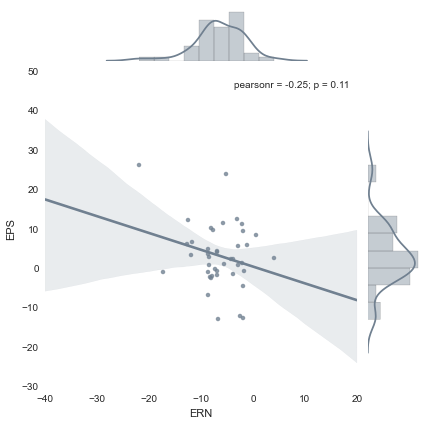

In [26]:
sns.jointplot(error_trials['ERN'],error_trials['EPS'],kind="reg",stat_func=pearsonr, color = "slategray")

* mean amplitude (done)
* This difference between ERP amplitudes following errors vs. correct responses was significant (stats results here)
* the magnitude of which corresponded closely with the original study (mean difference between error and correct trials = XXµV; SEM = XX (done)
* This effect was significant (stats results here) (done)

In [23]:
correct = pd.read_csv('data/rep_Cor_all.txt',delim_whitespace=True)

In [5]:
incorrect = pd.read_csv('data/rep_Inc_All.txt',delim_whitespace=True)

In [25]:
correct['File'] = correct['File'].apply(lambda x: x.translate(None, '_repCor'))
incorrect['File'] = incorrect['File'].apply(lambda x: x.translate(None, '_repInc'))

In [29]:
incorrect = incorrect[['File','2-rep_Inc']]
correct = correct[['File','2-rep_Cor']]

In [93]:
erp = pd.merge(correct, incorrect, on='File')

In [94]:
erp.rename(columns={'File':'participant','2-rep_Cor':'correct','2-rep_Inc':'error'},inplace=True)

In [95]:
erp['participant'] = erp['participant'].apply(lambda x: int(x))

In [96]:
erp['ERN'] = erp['error']-erp['correct']

In [97]:
erp.sort('participant',inplace=True)

In [100]:
# difference between ERPs on correct vs error trials
stats.ttest_rel(erp['correct'], erp['error'])

(8.6910940198988254, 7.6108247487161248e-11)

In [108]:
high_amplitude = final[final['ERN'] < -6.91]

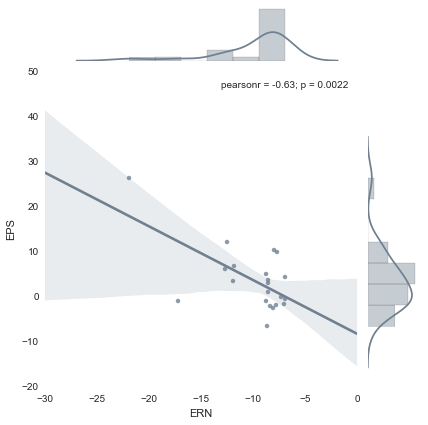

In [109]:
sns.jointplot(high_amplitude['ERN'],high_amplitude['EPS'],kind="reg",stat_func=pearsonr, color = "slategray")

In [111]:
high_amp_san_outlier = high_amplitude[high_amplitude['participant'] != 1]

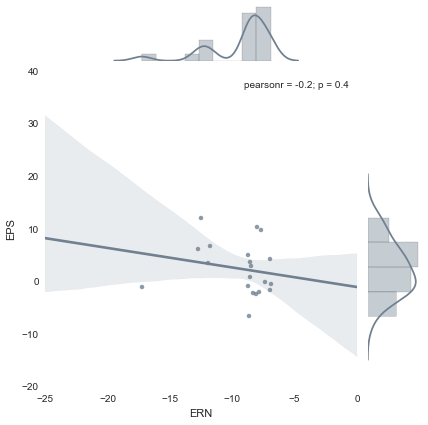

In [112]:
sns.jointplot(high_amp_san_outlier['ERN'],high_amp_san_outlier['EPS'],kind="reg",stat_func=pearsonr, color = "slategray")

In [115]:
collaboration = pd.read_csv('collaboration.csv')

In [117]:
collaboration.rename(columns={'ERN (window difference wave)':'ERN','Error-potentiated startle':'EPS'},inplace=True)

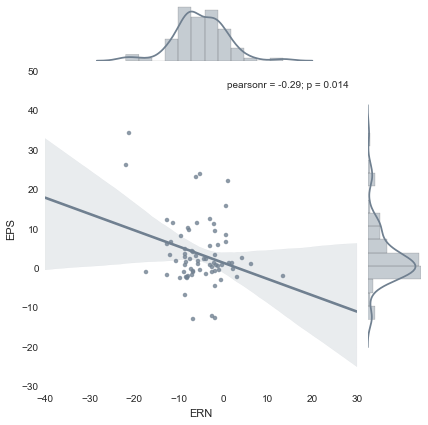

In [119]:
sns.jointplot(collaboration['ERN'],collaboration['EPS'],kind="reg",stat_func=pearsonr, color = "slategray")

In [124]:
collab_sans_outlier = collaboration[collaboration['ERN'] > -20]

,File,1-rep_Cor,2-rep_Cor,3-rep_Cor,4-rep_Cor,5-rep_Cor,6-rep_Cor,7-rep_Cor,8-rep_Cor,9-rep_Cor,...,87-rep_Cor,88-rep_Cor,89-rep_Cor,90-rep_Cor,91-rep_Cor,92-rep_Cor,93-rep_Cor,94-rep_Cor,EMG2-rep_Cor,96-rep_Cor
0,p1_rep_Cor,-0.699881,-2.154708,-1.001050,0.271778,1.600437,-0.732648,-1.760874,-0.908879,-0.968987,...,-0.823517,-0.256502,-0.059772,0.172407,1.252538,1.375486,0.838255,-0.922270,-17.586060,-10.823536
1,p11_rep_Cor,0.014091,-1.179367,-0.220336,0.824127,0.866532,0.085855,-0.473206,-0.166876,0.473281,...,-0.242779,-0.525585,-0.058522,-0.297858,-0.212392,-0.177393,-0.039143,-0.365921,-4.523234,-2.799507
2,p12_rep_Cor,2.963892,2.841932,2.314601,2.008688,3.850310,3.905464,1.941511,1.516522,1.497378,...,-1.201549,-1.767380,-1.679432,-1.531171,-1.062927,-0.072244,-0.234536,0.422589,-5.385313,-1.908907
3,p13_rep_Cor,8.366549,6.695670,7.556026,7.860309,8.204665,7.855669,4.670750,5.184700,7.076599,...,-2.035651,-2.337846,-1.552760,-1.165004,-0.599869,-0.207867,-1.515755,-1.241602,-44.552822,-16.949114
4,p14_rep_Cor,3.753604,1.952070,2.441402,2.961253,3.550722,2.499578,0.017398,0.819847,1.325740,...,-1.119661,-0.846418,-0.881866,-0.643111,-0.810958,0.320424,-0.091185,-1.481156,-13.144213,-7.597389
5,p15_rep_Cor,-0.576024,0.404668,-0.107175,-1.090679,-0.656449,0.150628,0.647356,0.380240,-0.097996,...,-0.690141,-0.794804,-1.068874,-0.889154,-0.149156,0.612478,-0.702413,-1.592310,-11.397579,-6.612736
6,p16_rep_Cor,5.590347,3.973493,4.294554,5.088929,5.072528,4.408303,1.352201,1.930184,2.608485,...,-0.643286,0.161675,-0.411331,0.162910,0.515583,0.608577,-0.677638,-2.009192,-23.933081,-20.174929
7,p17_rep_Cor,3.300729,1.708102,2.885584,3.987586,3.966316,2.719545,0.142986,0.642548,2.208986,...,-1.479672,-0.751465,-0.032934,-0.543302,-0.269394,-0.658289,-1.742356,-2.910199,-27.952803,-18.832335
8,p19_rep_Cor,2.513317,1.678488,1.430589,2.000114,2.158450,2.138056,0.406811,-0.091268,0.446851,...,-1.423303,-0.993018,-2.477171,-3.514120,-3.062124,-2.769468,-2.693882,-2.927153,-4.573598,-6.100647
9,p2_rep_Cor,1.954064,1.436417,1.847657,1.686791,1.755200,1.724617,0.623779,1.108289,1.377517,...,-0.618746,-1.327324,-0.530882,-0.888448,-0.800799,-1.584251,-0.532224,-0.413895,-7.383632,-7.185449


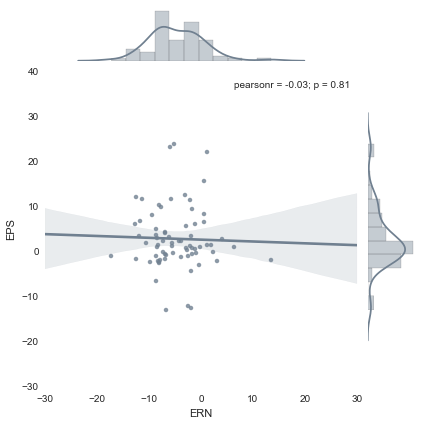

In [126]:
plot = sns.jointplot(collab_sans_outlier['ERN'],collab_sans_outlier['EPS'],kind="reg",stat_func=pearsonr, color = "slategray")